<a href="https://colab.research.google.com/github/jivitheshreddy/INFO-5731-Srping2023/blob/main/In_class_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and train data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

(1) MultinominalNB

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Load the training dataset
with open("stsa-train.txt") as f:
    data_train = [line.strip().split(" ", 1) for line in f]

df_train = pd.DataFrame(data_train, columns=["label", "text"])
df_train["label"] = df_train["label"].astype(int)

# Load the test dataset
with open("stsa-test.txt") as f:
    data_test = [line.strip().split(" ", 1) for line in f]

df_test = pd.DataFrame(data_test, columns=["label", "text"])
df_test["label"] = df_test["label"].astype(int)

# Convert text to features using TF-IDF vectorization
vectorizer = TfidfVectorizer(lowercase=False)
X_train = vectorizer.fit_transform(df_train["text"]).toarray()
X_test = vectorizer.transform(df_test["text"]).toarray()
y_train = df_train["label"].values
y_test = df_test["label"].values

# Split the training dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=202)

# Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = clf.predict(X_valid)

# Calculate evaluation metrics on the validation set
acc = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, pos_label=0)
recall = recall_score(y_valid, y_pred_valid, pos_label=0)
f1 = f1_score(y_valid, y_pred_valid, pos_label=0)

print(f"Accuracy on validation set: {round(acc * 100, 2)}%")
print(f"Precision on validation set: {round(precision * 100, 2)}%")
print(f"Recall on validation set: {round(recall * 100, 2)}%")
print(f"F1 score on validation set: {round(f1 * 100, 2)}%")

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Calculate evaluation metrics on the test set
acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=0)
recall = recall_score(y_test, y_pred_test, pos_label=0)
f1 = f1_score(y_test, y_pred_test, pos_label=0)

print(f"Accuracy on test set: {round(acc * 100, 2)}%")
print(f"Precision on test set: {round(precision * 100, 2)}%")
print(f"Recall on test set: {round(recall * 100, 2)}%")
print(f"F1 score on test set: {round(f1 * 100, 2)}%")


Accuracy on validation set: 78.9%
Precision on validation set: 81.94%
Recall on validation set: 72.11%
F1 score on validation set: 76.71%
Accuracy on test set: 80.45%
Precision on test set: 85.37%
Recall on test set: 73.57%
F1 score on test set: 79.03%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


naive_accuracies_validation = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)
print(f"Naive Bayes Model 10-fold cross validation score on training set is: {round(naive_accuracies_validation.mean()*100)}%")

predictions_test_set = classifier.predict(x_test) 
print("Accuracy of the Naive Bayes model on test set is: ", round(accuracy_score(y_test, predictions_test_set)*100), "%")
print("Precision of the Naive Bayes model on test set is: ", round(precision_score(y_test, predictions_test_set, pos_label=0)*100), "%")
print("Recall of the Naive Bayes model on test set is: ", round(recall_score(y_test, predictions_test_set, pos_label=0)*100), "%")
print("F1 Score of the Naive Bayes model on test set is: ", round(f1_score(y_test, predictions_test_set, pos_label=0)*100), "%")

cr_naive_test = classification_report(y_test, predictions_test_set)
print("Classification Report: \n", cr_naive_test)

naive_accuracies_test = cross_val_score(estimator=classifier, X=x_test, y=y_test, cv=10)
print(f"Naive Bayes Model 10-fold cross validation score on testing set is: {round(naive_accuracies_test.mean()*100)}%")



Naive Bayes Model 10-fold cross validation score on training set is: 79%
Accuracy of the Naive Bayes model on test set is:  80 %
Precision of the Naive Bayes model on test set is:  85 %
Recall of the Naive Bayes model on test set is:  74 %
F1 Score of the Naive Bayes model on test set is:  79 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       912
           1       0.77      0.87      0.82       909

    accuracy                           0.80      1821
   macro avg       0.81      0.80      0.80      1821
weighted avg       0.81      0.80      0.80      1821

Naive Bayes Model 10-fold cross validation score on testing set is: 75%


2)SVM

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = clf.predict(X_valid)

# Calculate evaluation metrics on the validation set
acc = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, pos_label=0)
recall = recall_score(y_valid, y_pred_valid, pos_label=0)
f1 = f1_score(y_valid, y_pred_valid, pos_label=0)

print(f"Accuracy on validation set: {round(acc * 100, 2)}%")
print(f"Precision on validation set: {round(precision * 100, 2)}%")
print(f"Recall on validation set: {round(recall * 100, 2)}%")
print(f"F1 score on validation set: {round(f1 * 100, 2)}%")

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Calculate evaluation metrics on the test set
acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=0)
recall = recall_score(y_test, y_pred_test, pos_label=0)
f1 = f1_score(y_test, y_pred_test, pos_label=0)

print(f"Accuracy on test set: {round(acc * 100, 2)}%")
print(f"Precision on test set: {round(precision * 100, 2)}%")
print(f"Recall on test set: {round(recall * 100, 2)}%")
print(f"F1 score on test set: {round(f1 * 100, 2)}%")


Accuracy on validation set: 79.55%
Precision on validation set: 79.63%
Recall on validation set: 77.36%
F1 score on validation set: 78.48%
Accuracy on test set: 79.96%
Precision on test set: 81.26%
Recall on test set: 77.96%
F1 score on test set: 79.57%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Perform 10-fold cross validation on the training set
svm_accuracies_validation = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
print(f"SVM 10-fold cross validation score on training set is: {round(svm_accuracies_validation.mean()*100)}%")

# Make predictions on the test set and calculate evaluation metrics
y_pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=0)
recall = recall_score(y_test, y_pred_test, pos_label=0)
f1 = f1_score(y_test, y_pred_test, pos_label=0)

# Print evaluation metrics on the test set
print("Accuracy of the SVM model on test set is: ", round(acc*100), "%")
print("Precision of the SVM model on test set is: ", round(precision*100), "%")
print("Recall of the SVM model on test set is: ", round(recall*100), "%")
print("F1 Score of the SVM model on test set is: ", round(f1*100), "%")

# Print classification report on the test set
cr_svm_test = classification_report(y_test, y_pred_test)
print("Classification Report: \n", cr_svm_test)

# Perform 10-fold cross validation on the test set
svm_accuracies_test = cross_val_score(estimator=clf, X=X_test, y=y_test, cv=10)
print(f"SVM 10-fold cross validation score on testing set is: {round(svm_accuracies_test.mean()*100)}%")


SVM 10-fold cross validation score on training set is: 78%
Accuracy of the SVM model on test set is:  80 %
Precision of the SVM model on test set is:  81 %
Recall of the SVM model on test set is:  78 %
F1 Score of the SVM model on test set is:  80 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       912
           1       0.79      0.82      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

SVM 10-fold cross validation score on testing set is: 73%


3) KNN

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = clf.predict(X_valid)

# Calculate evaluation metrics on the validation set
acc = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, pos_label=0)
recall = recall_score(y_valid, y_pred_valid, pos_label=0)
f1 = f1_score(y_valid, y_pred_valid, pos_label=0)

print(f"Accuracy on validation set: {round(acc * 100, 2)}%")
print(f"Precision on validation set: {round(precision * 100, 2)}%")
print(f"Recall on validation set: {round(recall * 100, 2)}%")
print(f"F1 score on validation set: {round(f1 * 100, 2)}%")

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Calculate evaluation metrics on the test set
acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=0)
recall = recall_score(y_test, y_pred_test, pos_label=0)
f1 = f1_score(y_test, y_pred_test, pos_label=0)

print(f"Accuracy on test set: {round(acc * 100, 2)}%")
print(f"Precision on test set: {round(precision * 100, 2)}%")
print(f"Recall on test set: {round(recall * 100, 2)}%")
print(f"F1 score on test set: {round(f1 * 100, 2)}%")


Accuracy on validation set: 74.13%
Precision on validation set: 75.2%
Recall on validation set: 69.12%
F1 score on validation set: 72.03%
Accuracy on test set: 73.04%
Precision on test set: 76.35%
Recall on test set: 66.89%
F1 score on test set: 71.3%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Perform 10-fold cross validation on the training set
knn_accuracies_validation = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
print(f"KNN 10-fold cross validation score on training set is: {round(knn_accuracies_validation.mean()*100)}%")

# Make predictions on the test set and calculate evaluation metrics
y_pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=0)
recall = recall_score(y_test, y_pred_test, pos_label=0)
f1 = f1_score(y_test, y_pred_test, pos_label=0)

# Print evaluation metrics on the test set
print("Accuracy of the KNN model on test set is: ", round(acc*100), "%")
print("Precision of the KNN model on test set is: ", round(precision*100), "%")
print("Recall of the KNN model on test set is: ", round(recall*100), "%")
print("F1 Score of the KNN model on test set is: ", round(f1*100), "%")

# Print classification report on the test set
cr_knn_test = classification_report(y_test, y_pred_test)
print("Classification Report: \n", cr_knn_test)

# Perform 10-fold cross validation on the test set
knn_accuracies_test = cross_val_score(estimator=clf, X=X_test, y=y_test, cv=10)
print(f"KNN 10-fold cross validation score on testing set is: {round(knn_accuracies_test.mean()*100)}%")


KNN 10-fold cross validation score on training set is: 71%
Accuracy of the KNN model on test set is:  73 %
Precision of the KNN model on test set is:  76 %
Recall of the KNN model on test set is:  67 %
F1 Score of the KNN model on test set is:  71 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.67      0.71       912
           1       0.70      0.79      0.75       909

    accuracy                           0.73      1821
   macro avg       0.73      0.73      0.73      1821
weighted avg       0.73      0.73      0.73      1821

KNN 10-fold cross validation score on testing set is: 67%


4)Decison Tree

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = clf.predict(X_valid)

# Calculate evaluation metrics on the validation set
acc = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, pos_label=0)
recall = recall_score(y_valid, y_pred_valid, pos_label=0)
f1 = f1_score(y_valid, y_pred_valid, pos_label=0)

print(f"Accuracy on validation set: {round(acc * 100, 2)}%")
print(f"Precision on validation set: {round(precision * 100, 2)}%")
print(f"Recall on validation set: {round(recall * 100, 2)}%")
print(f"F1 score on validation set: {round(f1 * 100, 2)}%")

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Calculate evaluation metrics on the test set
acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=0)
recall = recall_score(y_test, y_pred_test, pos_label=0)
f1 = f1_score(y_test, y_pred_test, pos_label=0)

print(f"Accuracy on test set: {round(acc * 100, 2)}%")
print(f"Precision on test set: {round(precision * 100, 2)}%")
print(f"Recall on test set: {round(recall * 100, 2)}%")
print(f"F1 score on test set: {round(f1 * 100, 2)}%")

# Perform 10-fold cross validation on the training set
dt_accuracies_validation = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
print(f"Decision Tree 10-fold cross validation score on training set is: {round(dt_accuracies_validation.mean()*100)}%")

# Make predictions on the test set and calculate evaluation metrics
y_pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=0)
recall = recall_score(y_test, y_pred_test, pos_label=0)
f1 = f1_score(y_test, y_pred_test, pos_label=0)

# Print evaluation metrics on the test set
print("Accuracy of the Decision Tree model on test set is: ", round(acc*100), "%")
print("Precision of the Decision Tree model on test set is: ", round(precision*100), "%")
print("Recall of the Decision Tree model on test set is: ", round(recall*100), "%")
print("F1 Score of the Decision Tree model on test set is: ", round(f1*100), "%")

# Print classification report on the test set
cr_dt_test = classification_report(y_test, y_pred_test)
print("Classification Report: \n", cr_dt_test)

# Perform 10-fold cross validation on the test set
dt_accuracies_test = cross_val_score(estimator=clf, X=X_test, y=y_test, cv=10)
print(f"Decision Tree 10-fold cross validation score on testing set is: {round(dt_accuracies_test.mean()*100)}%")


Accuracy on validation set: 61.56%
Precision on validation set: 60.15%
Recall on validation set: 59.97%
F1 score on validation set: 60.06%
Accuracy on test set: 62.82%
Precision on test set: 63.91%
Recall on test set: 59.21%
F1 score on test set: 61.47%
Decision Tree 10-fold cross validation score on training set is: 61%
Accuracy of the Decision Tree model on test set is:  63 %
Precision of the Decision Tree model on test set is:  64 %
Recall of the Decision Tree model on test set is:  59 %
F1 Score of the Decision Tree model on test set is:  61 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.59      0.61       912
           1       0.62      0.66      0.64       909

    accuracy                           0.63      1821
   macro avg       0.63      0.63      0.63      1821
weighted avg       0.63      0.63      0.63      1821

Decision Tree 10-fold cross validation score on testing set is: 60%


5)Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = rf.predict(X_valid)

# Calculate evaluation metrics on the validation set
acc = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, pos_label=0)
recall = recall_score(y_valid, y_pred_valid, pos_label=0)
f1 = f1_score(y_valid, y_pred_valid, pos_label=0)

print(f"Accuracy on validation set: {round(acc * 100, 2)}%")
print(f"Precision on validation set: {round(precision * 100, 2)}%")
print(f"Recall on validation set: {round(recall * 100, 2)}%")
print(f"F1 score on validation set: {round(f1 * 100, 2)}%")

# Make predictions on the test set
y_pred_test = rf.predict(X_test)

# Calculate evaluation metrics on the test set
acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=0)
recall = recall_score(y_test, y_pred_test, pos_label=0)
f1 = f1_score(y_test, y_pred_test, pos_label=0)

print(f"Accuracy on test set: {round(acc * 100, 2)}%")
print(f"Precision on test set: {round(precision * 100, 2)}%")
print(f"Recall on test set: {round(recall * 100, 2)}%")
print(f"F1 score on test set: {round(f1 * 100, 2)}%")

# Perform 10-fold cross validation on the training set
rf_accuracies_validation = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
print(f"Random Forest 10-fold cross validation score on training set is: {round(rf_accuracies_validation.mean()*100)}%")

# Print classification report on the test set
cr_rf_test = classification_report(y_test, y_pred_test)
print("Classification Report: \n", cr_rf_test)

# Perform 10-fold cross validation on the test set
rf_accuracies_test = cross_val_score(estimator=rf, X=X_test, y=y_test, cv=10)
print(f"Random Forest 10-fold cross validation score on testing set is: {round(rf_accuracies_test.mean()*100)}%")


Accuracy on validation set: 71.6%
Precision on validation set: 72.46%
Recall on validation set: 66.27%
F1 score on validation set: 69.22%
Accuracy on test set: 71.66%
Precision on test set: 74.26%
Recall on test set: 66.45%
F1 score on test set: 70.14%
Random Forest 10-fold cross validation score on training set is: 71%
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.66      0.70       912
           1       0.70      0.77      0.73       909

    accuracy                           0.72      1821
   macro avg       0.72      0.72      0.72      1821
weighted avg       0.72      0.72      0.72      1821

Random Forest 10-fold cross validation score on testing set is: 67%


5)XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Train the XGBoost classifier with 100 estimators and a random seed of 42
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = xgb_model.predict(X_valid)

# Calculate evaluation metrics on the validation set
acc = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, pos_label=0)
recall = recall_score(y_valid, y_pred_valid, pos_label=0)
f1 = f1_score(y_valid, y_pred_valid, pos_label=0)

# Print the evaluation metrics for the validation set
print(f"Accuracy on validation set: {round(acc * 100, 2)}%")
print(f"Precision on validation set: {round(precision * 100, 2)}%")
print(f"Recall on validation set: {round(recall * 100, 2)}%")
print(f"F1 score on validation set: {round(f1 * 100, 2)}%")

# Make predictions on the test set
y_pred_test = xgb_model.predict(X_test)

# Calculate evaluation metrics on the test set
acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=0)
recall = recall_score(y_test, y_pred_test, pos_label=0)
f1 = f1_score(y_test, y_pred_test, pos_label=0)

# Print the evaluation metrics for the test set
print(f"Accuracy on test set: {round(acc * 100, 2)}%")
print(f"Precision on test set: {round(precision * 100, 2)}%")
print(f"Recall on test set: {round(recall * 100, 2)}%")
print(f"F1 score on test set: {round(f1 * 100, 2)}%")

# Perform 10-fold cross validation on the training set
xgb_accuracies_validation = cross_val_score(estimator=xgb_model, X=X_train, y=y_train, cv=10)
print(f"XGBoost 10-fold cross validation score on training set is: {round(xgb_accuracies_validation.mean()*100)}%")

# Print the classification report for the test set
cr_xgb_test = classification_report(y_test, y_pred_test)
print("Classification Report: \n", cr_xgb_test)

# Perform 10-fold cross validation on the test set
xgb_accuracies_test = cross_val_score(estimator=xgb_model, X=X_test, y=y_test, cv=10)
print(f"XGBoost 10-fold cross validation score on testing set is: {round(xgb_accuracies_test.mean()*100)}%")


Accuracy on validation set: 70.38%
Precision on validation set: 71.17%
Recall on validation set: 64.77%
F1 score on validation set: 67.82%
Accuracy on test set: 72.76%
Precision on test set: 75.43%
Recall on test set: 67.65%
F1 score on test set: 71.33%
XGBoost 10-fold cross validation score on training set is: 71%
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       912
           1       0.71      0.78      0.74       909

    accuracy                           0.73      1821
   macro avg       0.73      0.73      0.73      1821
weighted avg       0.73      0.73      0.73      1821

XGBoost 10-fold cross validation score on testing set is: 66%


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

K-means

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.1 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel

# Load the dataset
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df = df.sample(n=20000, random_state=42)

# Preprocess the text data
df['Reviews'] = df['Reviews'].str.lower()
df['Reviews'] = df['Reviews'].str.replace('[^a-zA-Z]', ' ')
df['Reviews'] = df['Reviews'].str.replace('\s+', ' ')

# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vects= TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['Reviews'].values.astype('U'))

<ipython-input-8-91195017ba30>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('[^a-zA-Z]', ' ')
<ipython-input-8-91195017ba30>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('\s+', ' ')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'WCSS')

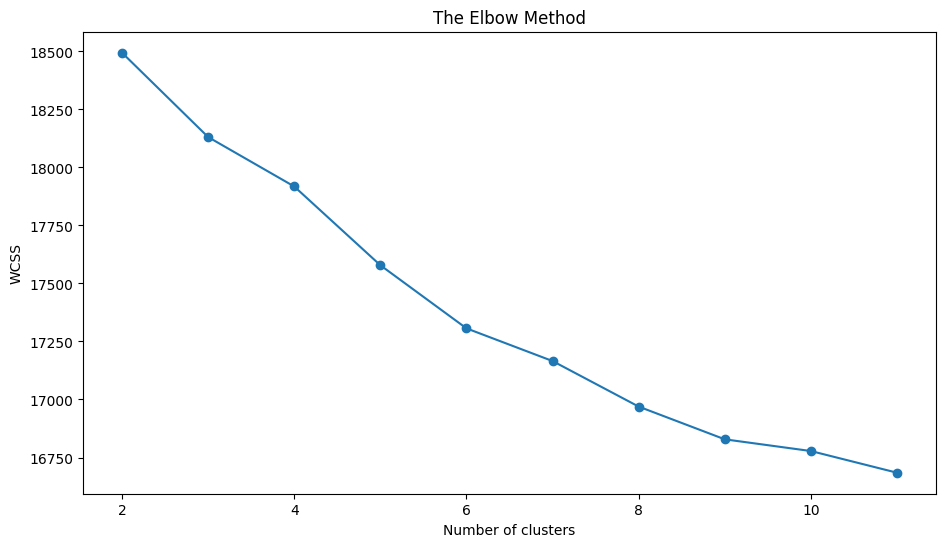

In [9]:
## ELBOW METHOD

from sklearn.cluster import KMeans
wcss = []
for i in range(2,12):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 101)
    kmeans.fit(tfidf_vects)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (11,6))
plt.plot(range(2,12), wcss, marker = "o")
plt.title ("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")


In [26]:
from sklearn.cluster import KMeans

# create an instance of KMeans with 6 clusters
model = KMeans(n_clusters=6, random_state=42)

# fit the data to the model
model.fit(tfidf_vects)
feature_names = tfidf_vect.get_feature_names_out()

# get the centroids for each cluster
centroids = model.cluster_centers_.argsort()[:, ::-1]

# define the number of top words to extract per cluster
top_words = 7

# extract the top words for each cluster
for cluster_num in range(6):
    key_features = [feature_names[i] for i in centroids[cluster_num, :top_words]]
    print('Cluster ' + str(cluster_num+1))
    print('Top Words:', key_features)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1
Top Words: ['good', 'very', 'phone', 'product', 'price', 'it', 'is']
Cluster 2
Top Words: ['the', 'it', 'and', 'phone', 'to', 'is', 'this']
Cluster 3
Top Words: ['it', 'phone', 'love', 'and', 'the', 'very', 'good']
Cluster 4
Top Words: ['excellent', 'product', 'phone', 'recommend', 'condition', 'very', 'thank']
Cluster 5
Top Words: ['great', 'phone', 'works', 'product', 'price', 'it', 'for']
Cluster 6
Top Words: ['excelente', 'producto', 'recomendado', 'telefono', 'gracias', 'movil', 'servicio']


In [27]:
cluster_center=model.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00736928e-05, 6.17174608e-06, 0.00000000e+00, ...,
        8.92506306e-06, 6.38683863e-05, 0.00000000e+00],
       [7.49374306e-05, 3.48328622e-04, 1.89215235e-05, ...,
        0.00000000e+00, 3.59058705e-05, 6.47030255e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.27711269e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [20]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
reviews=[]
for i in df['Reviews']:
    reviews.append(str(i).split())
import gensim
w2v_model=gensim.models.Word2Vec(reviews, vector_size =100, workers=4)

import numpy as np
vectors = []
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

<ipython-input-30-84fa02f916c3>:19: RuntimeWarning: invalid value encountered in true_divide
  vector /= count


In [31]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
# Lower bound function
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour.    
    return dists[199]

vectors.shape

(20000, 100)

In [32]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in vectors[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vectors[:1000]) )
twohundrethneigh.sort()

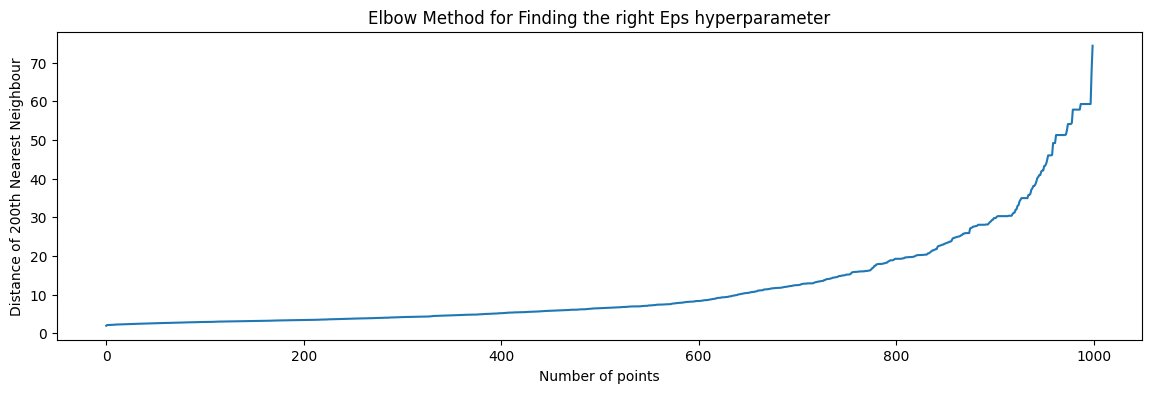

In [33]:
# Plotting for the Elbow Method :
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [34]:
# Create the model
model_dbs = DBSCAN(eps = 5, min_samples = minPts)
model_dbs.fit(vectors)

DBSCAN(eps=5, min_samples=200)

In [35]:
df_dbs = df
df_dbs["DBS Cluster Label"] = model_dbs.labels_
df_dbs

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,DBS Cluster Label
54870,Apple iPhone 6 Plus 128GB Factory Unlocked GSM...,NaN,699.95,1,defective phone works only for two days phone ...,5.0,0
188521,HTC Desire 816 Dual Sim Unlocked Smartphone (W...,HTC,221.00,3,cool,0.0,0
137548,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,5,beautiful and excellent quality,1.0,0
24906,Apple iPhone 5c 16GB (Pink) - AT&T,Apple,519.00,2,gave stars because it did not come with a char...,0.0,0
131601,BLU PURE XL Smartphone - 4G LTE GSM Unlocked -...,BLU,129.99,1,high resolution camera so you can zoom in afte...,1.0,0
...,...,...,...,...,...,...,...
271097,Nokia Lumia 822 GSM Unlocked GSM Windows Phone...,Nokia,88.99,5,this was a temp cell phone while waiting for m...,0.0,0
404146,Unlocked Quad-band S29 Smart Watch Phone Micro...,NaN,59.99,5,i don t remember ordering this but it was on m...,0.0,0
358442,Samsung Galaxy S5 SM-G900H Factory Unlocked Ce...,Samsung,339.99,5,aaa,0.0,0
266615,Nokia Lumia 1020 32GB Unlocked GSM Phone w/ 41...,Nokia,296.00,5,ok,0.0,0


Hierarchical clustering

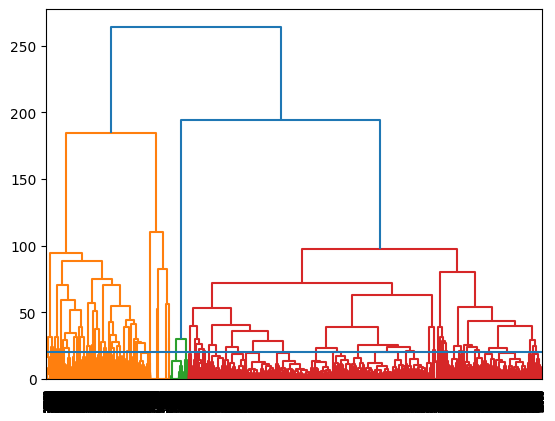

In [36]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=20)

In [37]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  #took n=3 from dendrogram curve 
Agg=cluster.fit_predict(vectors)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
df['AVG-W2V Clus Label'] = cluster.labels_
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,DBS Cluster Label,AVG-W2V Clus Label
54870,Apple iPhone 6 Plus 128GB Factory Unlocked GSM...,NaN,699.95,1,defective phone works only for two days phone ...,5.0,0,1
188521,HTC Desire 816 Dual Sim Unlocked Smartphone (W...,HTC,221.00,3,cool,0.0,0,0
137548,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,5,beautiful and excellent quality,1.0,0,0
24906,Apple iPhone 5c 16GB (Pink) - AT&T,Apple,519.00,2,gave stars because it did not come with a char...,0.0,0,1
131601,BLU PURE XL Smartphone - 4G LTE GSM Unlocked -...,BLU,129.99,1,high resolution camera so you can zoom in afte...,1.0,0,1


In [39]:
hier_df = df # Give the labels and group to count the number of data in each clusters.
hier_df["Hierarchial Cluster Labels"] = cluster.labels_
hier_df.groupby(["Hierarchial Cluster Labels"])["Reviews"].count()

Hierarchial Cluster Labels
0     5041
1    14238
2      716
Name: Reviews, dtype: int64

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)


